# Task 2 : Prediction using Decision Tree Algorithm 

## Sonali Arora | Data Science Intern | LetsGrowMore | Oct'21

### Import Libraries

In [11]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (15,10)
%matplotlib inline

In [3]:
import warnings
warnings.filterwarnings('ignore')

## Reading the Dataset

In [6]:
df = pd.read_csv('data/Iris.csv')

In [7]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


## Visualisation of the Dataset 

<AxesSubplot:xlabel='Species', ylabel='count'>

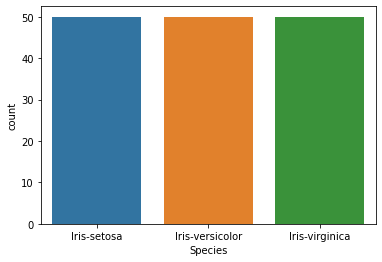

In [8]:
sns.countplot(x='Species',data=df)

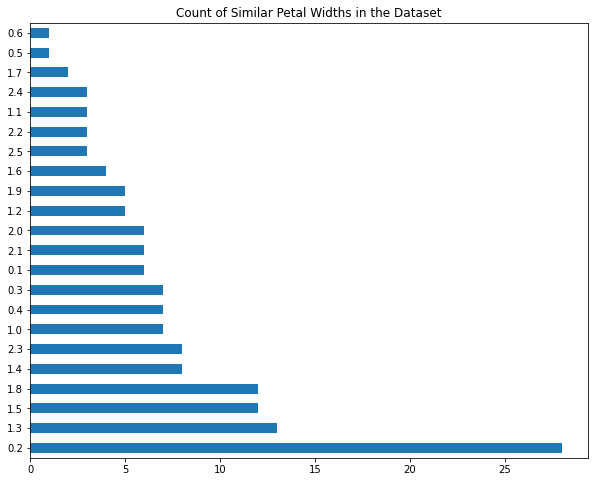

In [78]:
plt.figure(figsize=(10,8))
val = df['PetalWidthCm'].value_counts()
val.plot(kind='barh')
plt.title('Count of Similar Petal Widths in the Dataset')
plt.show()

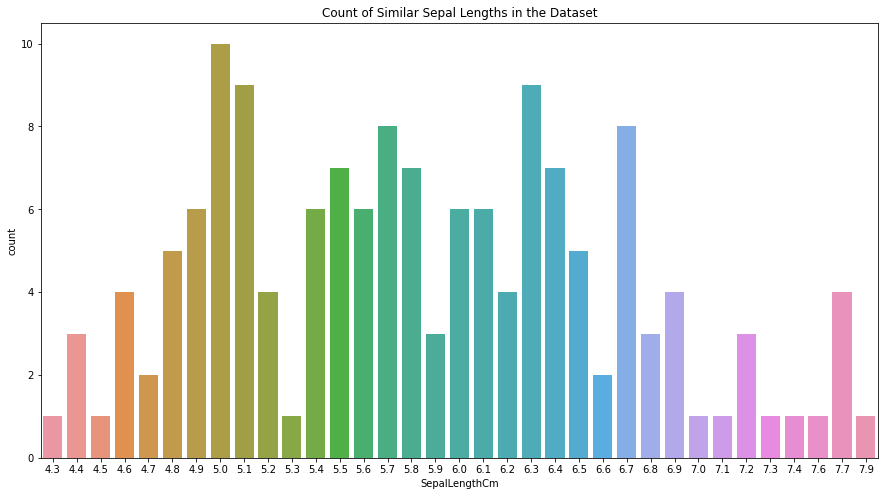

In [77]:
plt.figure(figsize=(15,8))
sns.countplot(x='SepalLengthCm',data=df)
plt.title('Count of Similar Sepal Lengths in the Dataset')
plt.show()

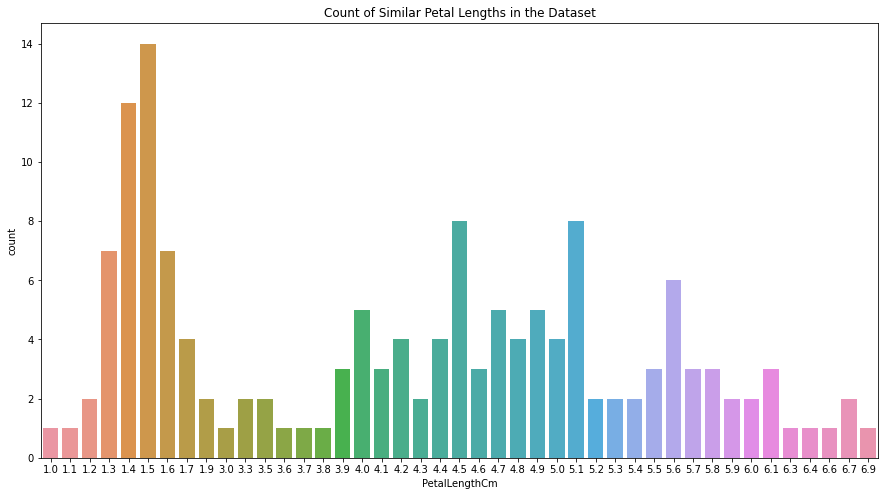

In [76]:
plt.figure(figsize=(15,8))
sns.countplot(x='PetalLengthCm',data=df)
plt.title('Count of Similar Petal Lengths in the Dataset')
plt.show()

<AxesSubplot:xlabel='PetalLengthCm'>

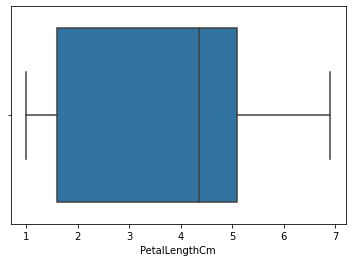

In [36]:
sns.boxplot(x='PetalLengthCm',data=df)

<AxesSubplot:xlabel='SepalLengthCm'>

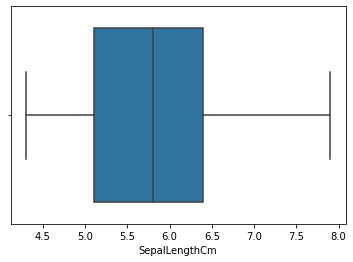

In [37]:
sns.boxplot(x='SepalLengthCm',data=df)

<AxesSubplot:xlabel='SepalWidthCm'>

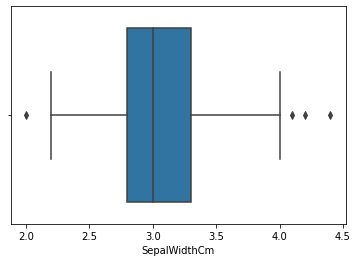

In [38]:
sns.boxplot(x='SepalWidthCm',data=df)

<AxesSubplot:xlabel='PetalWidthCm'>

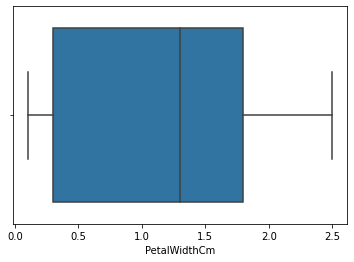

In [39]:
sns.boxplot(x='PetalWidthCm',data=df)

<AxesSubplot:xlabel='SepalLengthCm', ylabel='Density'>

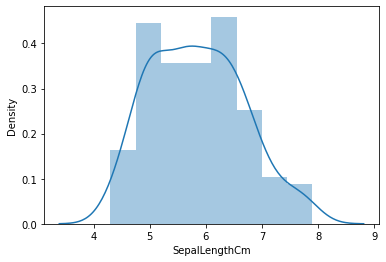

In [40]:
sns.distplot(df["SepalLengthCm"])

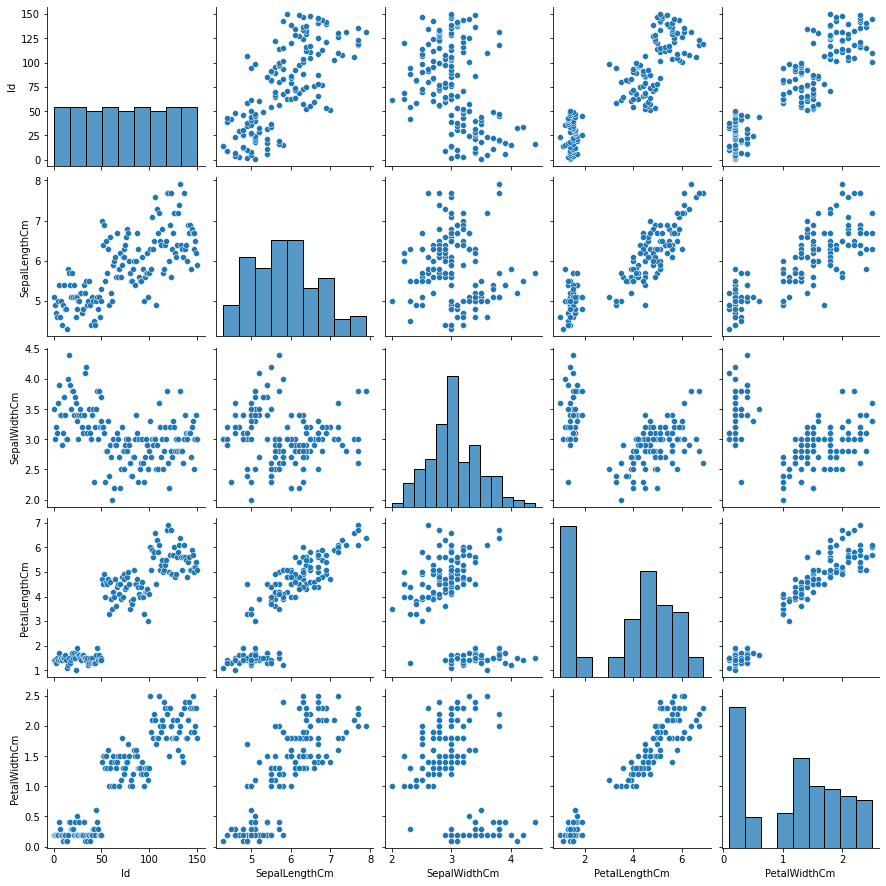

In [43]:
sns.pairplot(df)

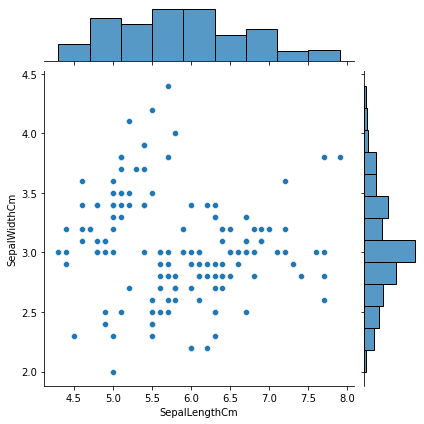

In [44]:
sns.jointplot(x="SepalLengthCm", y="SepalWidthCm", data=df)

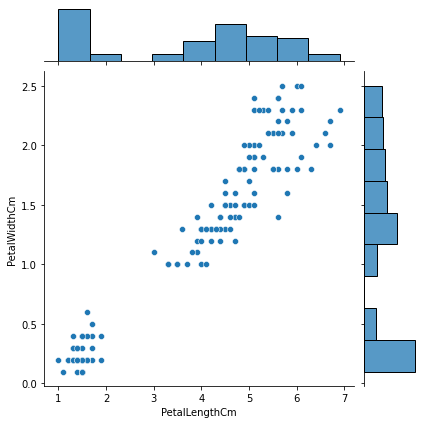

In [45]:
sns.jointplot(x="PetalLengthCm", y="PetalWidthCm", data=df)

## Training, Testing and Validation 

In [48]:
df.drop(columns=['Id'],inplace=True)

In [63]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Species'] = encode.fit_transform(df['Species'])

In [64]:
X = df.iloc[:,:-1].values
y = df.iloc[:,-1].values

In [65]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [66]:
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()

In [67]:
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [68]:
pred = model.predict(X_test)

In [69]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.92      1.00      0.96        12
           2       1.00      0.88      0.93         8

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.96        30
weighted avg       0.97      0.97      0.97        30



In [70]:
confusion_matrix(y_test,pred)

array([[10,  0,  0],
       [ 0, 12,  0],
       [ 0,  1,  7]])

In [71]:
from sklearn.metrics import r2_score,mean_squared_error,mean_absolute_error
from sklearn.model_selection import cross_val_score

In [72]:
mse = mean_absolute_error(pred,y_test)
mae = mean_squared_error(pred,y_test) 
score = r2_score(pred,y_test) 

In [79]:
print('The Mean Absolute Error Value is: ',mae)
print('The Mean Squared Error Value is: ',mse)
print('The R2 Score is: ',score)

The Mean Absolute Error Value is:  0.03333333333333333
The Mean Squared Error Value is:  0.03333333333333333
The R2 Score is:  0.9401197604790419


# Thank you 